### **Problem Statement**

##### - Predicting each score (Regression)



**Import Libraries**

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# # mac
# data = pd.read_csv('/Users/azel/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

#windows
data = pd.read_csv('C:/Users/azelt/OneDrive/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

Accuracy: 0.465

Classification Report:
               precision    recall  f1-score   support

        High       0.54      0.53      0.54        90
         Low       0.25      0.22      0.24        27
      Medium       0.45      0.47      0.46        83

    accuracy                           0.47       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.46      0.47      0.46       200



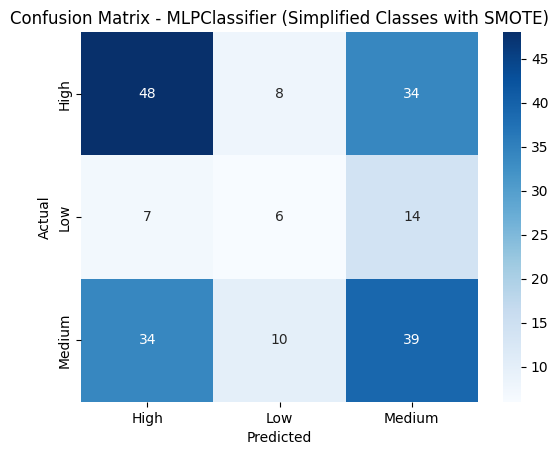

['mlp_classifier_model.pkl']

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Calculate Grades
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Simplify Grade Categories
def simplify_grade(number):
    if number >= 70: return 'High'
    elif number >= 50: return 'Medium'
    else: return 'Low'

data['performance_tier'] = data['average_score'].apply(simplify_grade)

# Step 2: Define Features and Target
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'performance_tier'])
y = data['performance_tier']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-Hot Encode Categorical Features
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Define and Train the Model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

# Step 4: Make Predictions
y_pred = mlp.predict(X_test)

# Step 5: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLPClassifier (Simplified Classes with SMOTE)')
plt.show()

# Optional: Save the trained model
import joblib
joblib.dump(mlp, 'mlp_classifier_model.pkl')
